In [1]:
import pyalex as alex
import numpy as np
import pandas
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#COLLECTING WORKS FROM THE "WATER RESOURCES RESEARCH" REPOSITORY FROM YEARS 2019 TO 2024
w = alex.Works().filter(primary_location = {"source": {"id": "s204847658"}}).filter(publication_year="2019-2024")

In [3]:
pages = []
for page in range(1, int(w.count()/100) + 2):
    pages.append(w.get(page=page, per_page=100))

In [4]:
raw_data = []
for page in pages:
    raw_data += page

In [5]:
raw_data[0]

{'id': 'https://openalex.org/W2946882019',
 'doi': 'https://doi.org/10.1029/2019wr024873',
 'title': 'MERIT Hydro: A High‐Resolution Global Hydrography Map Based on Latest Topography Dataset',
 'display_name': 'MERIT Hydro: A High‐Resolution Global Hydrography Map Based on Latest Topography Dataset',
 'publication_year': 2019,
 'publication_date': '2019-06-01',
 'ids': {'openalex': 'https://openalex.org/W2946882019',
  'doi': 'https://doi.org/10.1029/2019wr024873',
  'mag': '2946882019'},
 'language': 'en',
 'primary_location': {'is_oa': True,
  'landing_page_url': 'https://doi.org/10.1029/2019wr024873',
  'pdf_url': 'https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1029/2019WR024873',
  'source': {'id': 'https://openalex.org/S204847658',
   'display_name': 'Water resources research',
   'issn_l': '0043-1397',
   'issn': ['0043-1397', '1944-7973'],
   'is_oa': False,
   'is_in_doaj': False,
   'host_organization': 'https://openalex.org/P4310320503',
   'host_organization_name':

In [6]:
#Cleaning data. Out of the works we picked out the work id, author names and their affiliations, keywords, and referenced works.

data = []
for i in range(len(raw_data)):
    work = raw_data[i]
    id = work["id"]
    authorship = work["authorships"]
    authors = []
    affiliations = []
    keywords = []
    references = []
    for author in authorship:
        institutions = []
        for institution in author["institutions"]:
            institutions.append(institution["display_name"])
        authors.append([author["author"]["display_name"], institutions])
    for keyword in work["keywords"]:
        if "display_name" in keyword:
            keywords.append(keyword["display_name"])
    for reference in work["referenced_works"]:
        references.append(reference)
    datum = [id, work['display_name'], authors, keywords, references]
    data.append(datum)

In [7]:
#Converting the data to CSV
df = pandas.DataFrame(data)
df.to_csv("Data.csv")

In [8]:
#Histogram of authors publishing papers
authors = []
for datum in data:
    for author in datum[2]:
        authors.append(author[0])
authors[0]

'Dai Yamazaki'

In [9]:
data[0]

['https://openalex.org/W2946882019',
 'MERIT Hydro: A High‐Resolution Global Hydrography Map Based on Latest Topography Dataset',
 [['Dai Yamazaki',
   ['The University of Tokyo', 'Tokyo Institute of Technology']],
  ['Daiki Ikeshima', ['Tokyo Institute of Technology']],
  ['Jeison Sosa', ['University of Bristol']],
  ['Paul Bates', ['University of Bristol']],
  ['George H. Allen', ['Texas A&M University']],
  ['Tamlin M. Pavelsky', ['University of North Carolina at Chapel Hill']]],
 ['Surface Water Mapping',
  'Watershed Simulation',
  'Global Hydrology',
  'Hydrological Modeling'],
 ['https://openalex.org/W1657065621',
  'https://openalex.org/W1952891980',
  'https://openalex.org/W1981213426',
  'https://openalex.org/W2025969570',
  'https://openalex.org/W2030671664',
  'https://openalex.org/W2033355897',
  'https://openalex.org/W2051721130',
  'https://openalex.org/W2083971681',
  'https://openalex.org/W2084744129',
  'https://openalex.org/W2088733802',
  'https://openalex.org/W2093

In [10]:
from collections import Counter
authors = sorted(authors, key=Counter(authors).get, reverse=True)
auth_hist = []
for author in authors:
    if not auth_hist.count((author, authors.count(author))):
        auth_hist.append((author, authors.count(author)))
auth_hist[:10]
auth_hist2 = [x[1] for x in auth_hist]

10180


(array([9.653e+03, 3.020e+02, 8.600e+01, 2.200e+01, 1.900e+01, 5.500e+01,
        1.900e+01, 1.300e+01, 6.000e+00, 5.000e+00]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

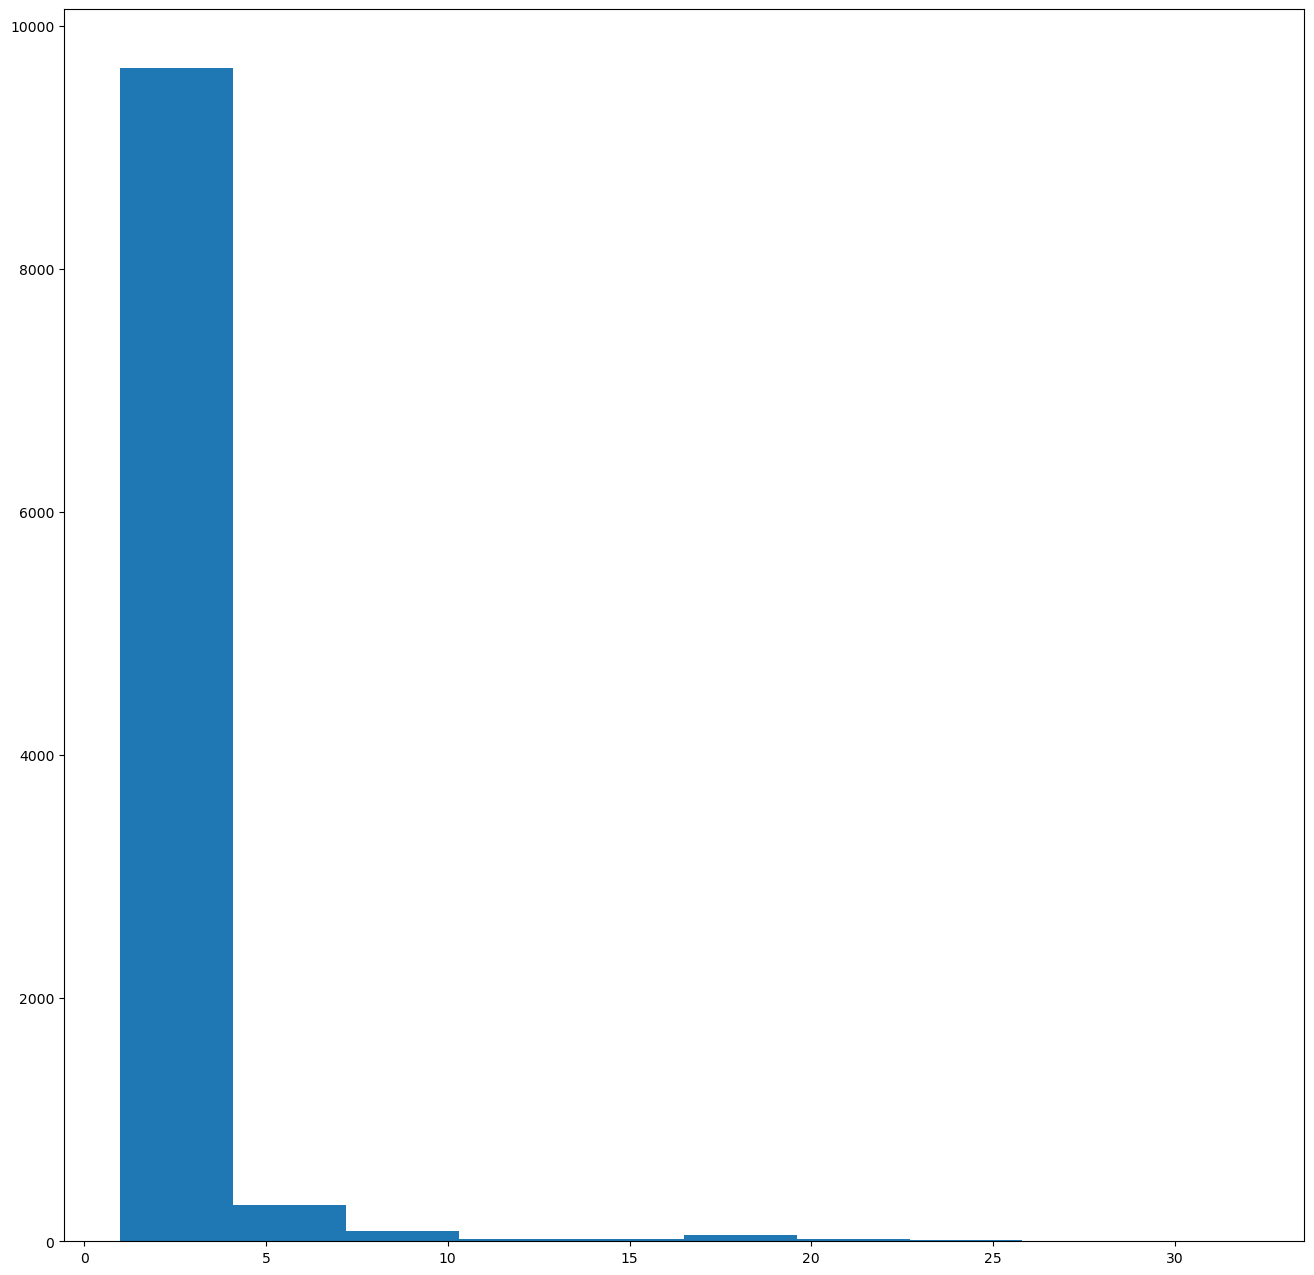

In [11]:
print(len(auth_hist2))
fig, ax = plt.subplots(figsize=(16,16))
ax.hist(auth_hist2)

In [12]:
#Histogram showing authors by number of co-authors
authors = {}

for datum in data:
    for author in datum[2]:
        authors[author[0]] = set()

for datum in data:
    for author in datum[2]:
        for coauthor in datum[2]:
            if author[0] != coauthor[0]:
                authors[author[0]].add(coauthor[0])

In [13]:
coauthors_count = authors.items()
coauthors_count = sorted(coauthors_count, key = lambda x:len(x[1]), reverse=True)
coauthors_hist = [len(x[1]) for x in coauthors_count]

(array([9.39e+03, 5.14e+02, 1.12e+02, 3.70e+01, 1.00e+01, 5.50e+01,
        4.10e+01, 1.50e+01, 5.00e+00, 1.00e+00]),
 array([  0. ,  19.6,  39.2,  58.8,  78.4,  98. , 117.6, 137.2, 156.8,
        176.4, 196. ]),
 <BarContainer object of 10 artists>)

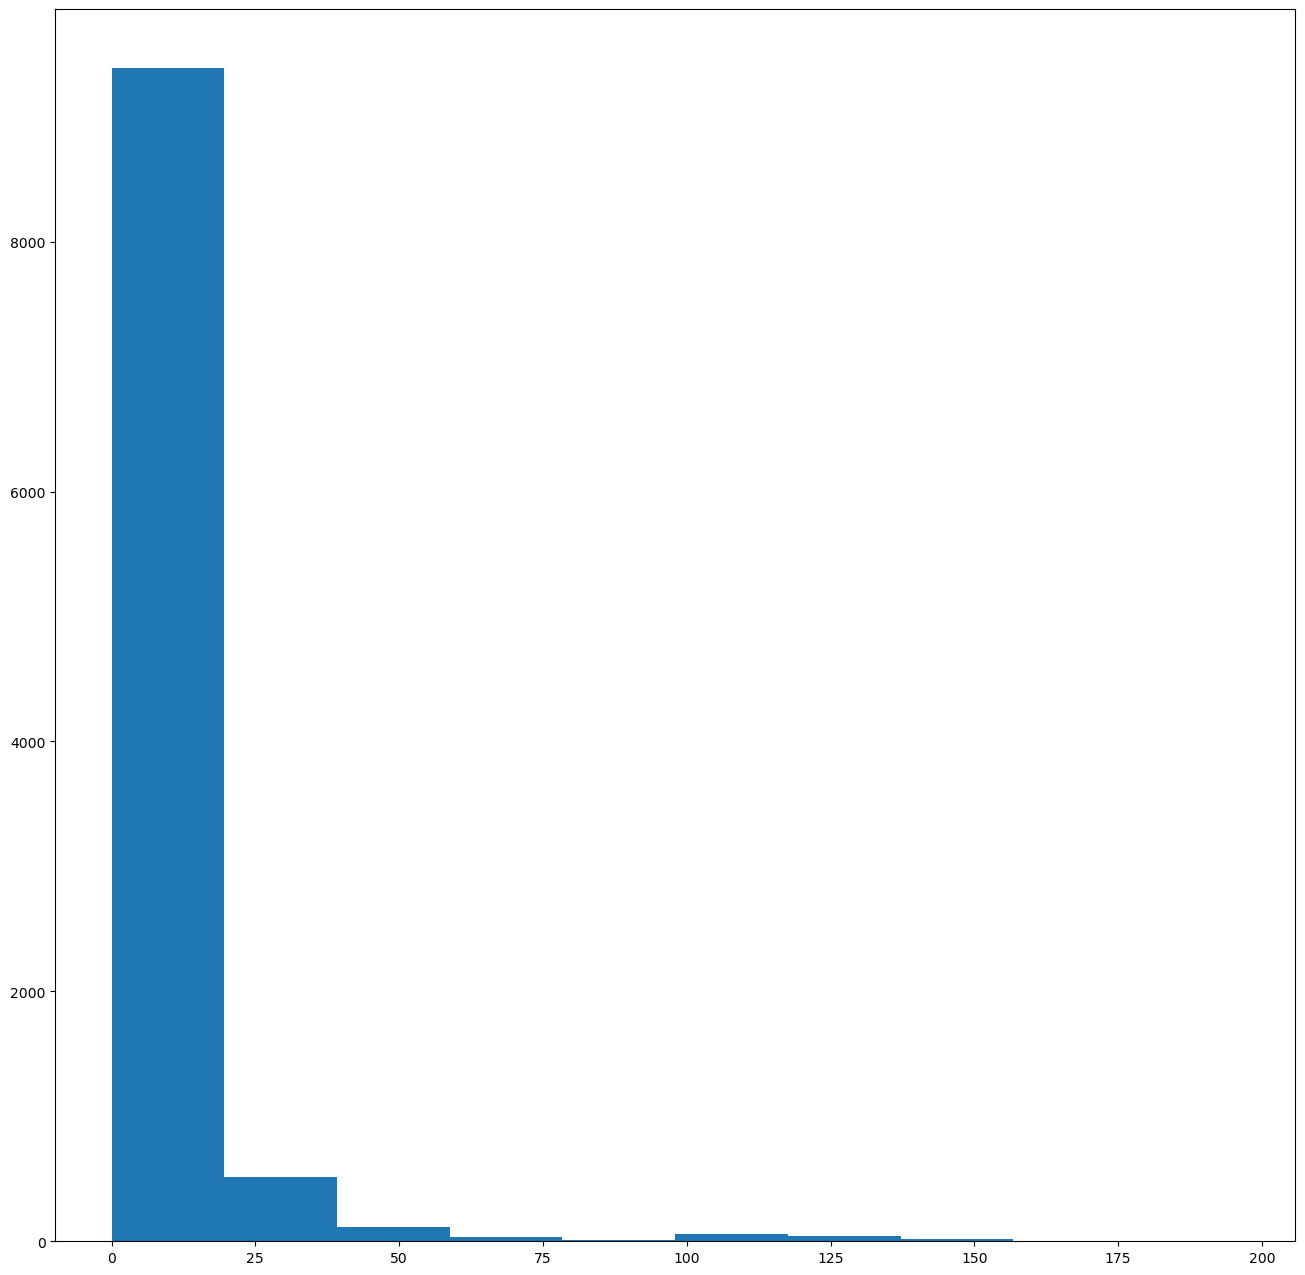

In [14]:
fig, ax = plt.subplots(figsize=(16,16))
ax.hist(coauthors_hist)

In [15]:
#universities histogram
institutions = []
for datum in data:
    temp_inst = []
    for author in datum[2]:
        for uni in author[1]:
            if not temp_inst.count(uni):
                temp_inst.append(uni)
    institutions += temp_inst
institutions[1]

'Tokyo Institute of Technology'

In [16]:
institutions = sorted(institutions, key=Counter(institutions).get, reverse=True)
inst_hist = []
for institution in institutions:
    if not inst_hist.count((institution, institutions.count(institution))):
        inst_hist.append((institution, institutions.count(institution)))
inst_hist2 = [x[1] for x in inst_hist]

(array([1.787e+03, 9.800e+01, 3.400e+01, 1.200e+01, 8.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  1. ,  16.9,  32.8,  48.7,  64.6,  80.5,  96.4, 112.3, 128.2,
        144.1, 160. ]),
 <BarContainer object of 10 artists>)

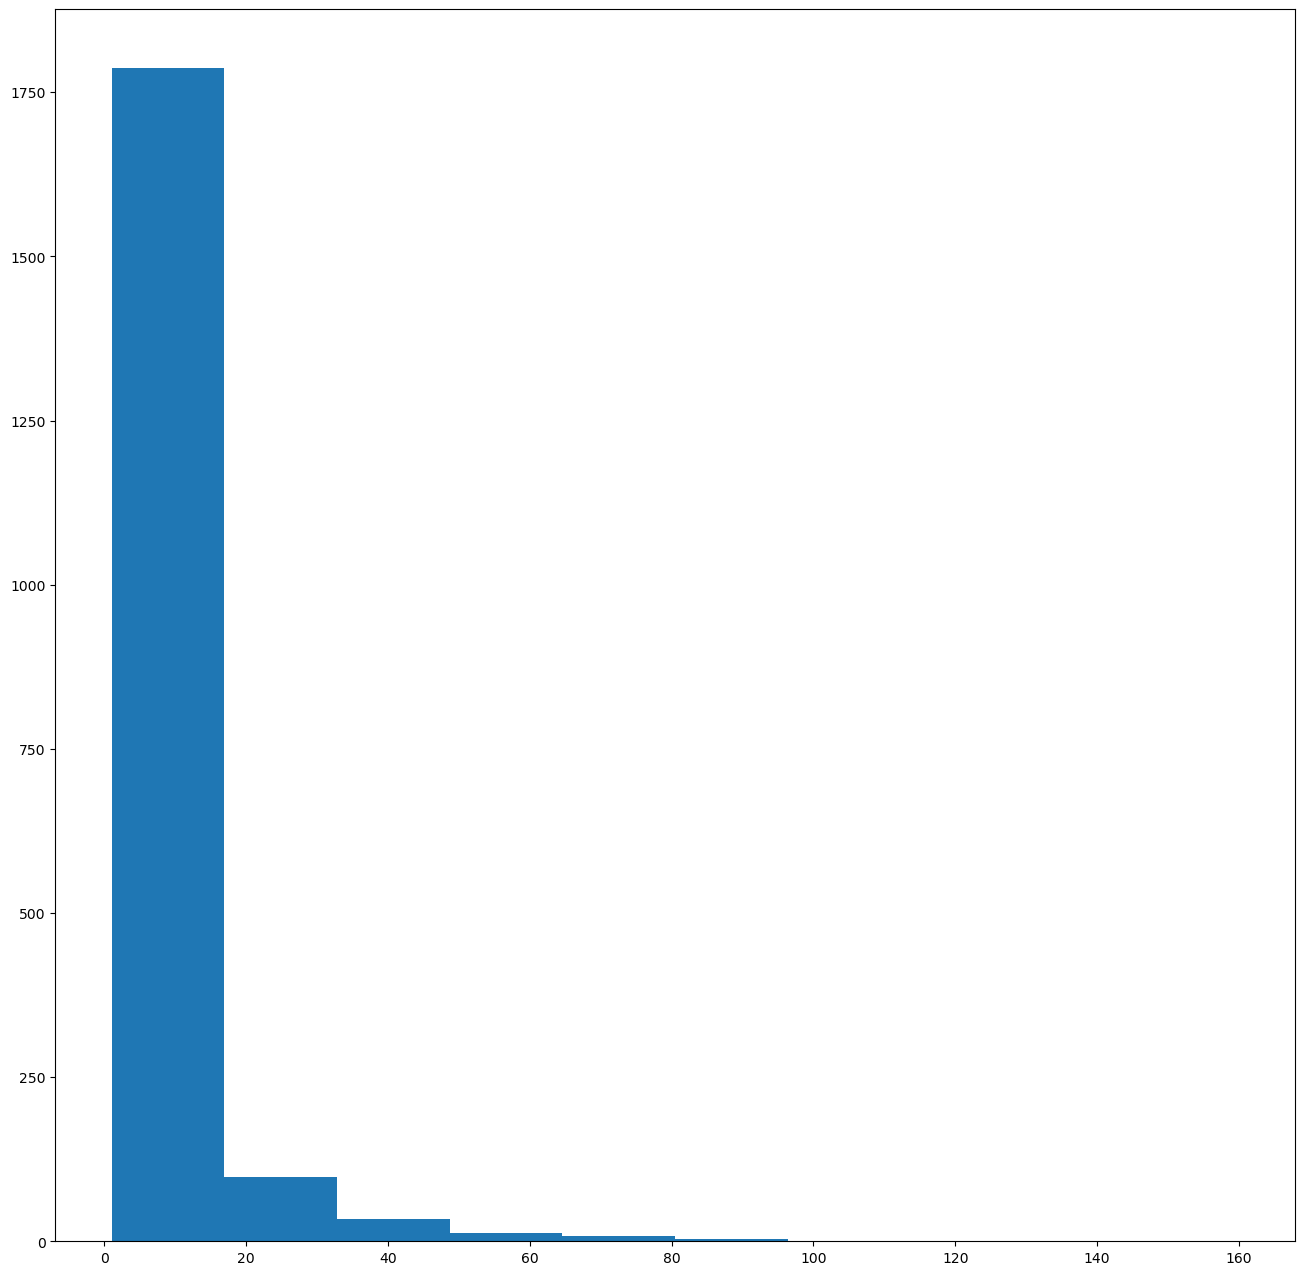

In [17]:
fig, ax = plt.subplots(figsize=(16,16))
ax.hist(inst_hist2)

In [18]:
#keywords histogram
keys = []
for datum in data:
    for keyword in datum[3]:
        keys.append(keyword)

In [19]:
keys = sorted(keys, key=Counter(keys).get, reverse=True)
keys_hist = []
for key in keys:
    if not keys_hist.count((key, keys.count(key))):
        keys_hist.append((key, keys.count(key)))
keys_hist2 = [x[1] for x in keys_hist]

(array([742.,  13.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([1.000e+00, 1.093e+02, 2.176e+02, 3.259e+02, 4.342e+02, 5.425e+02,
        6.508e+02, 7.591e+02, 8.674e+02, 9.757e+02, 1.084e+03]),
 <BarContainer object of 10 artists>)

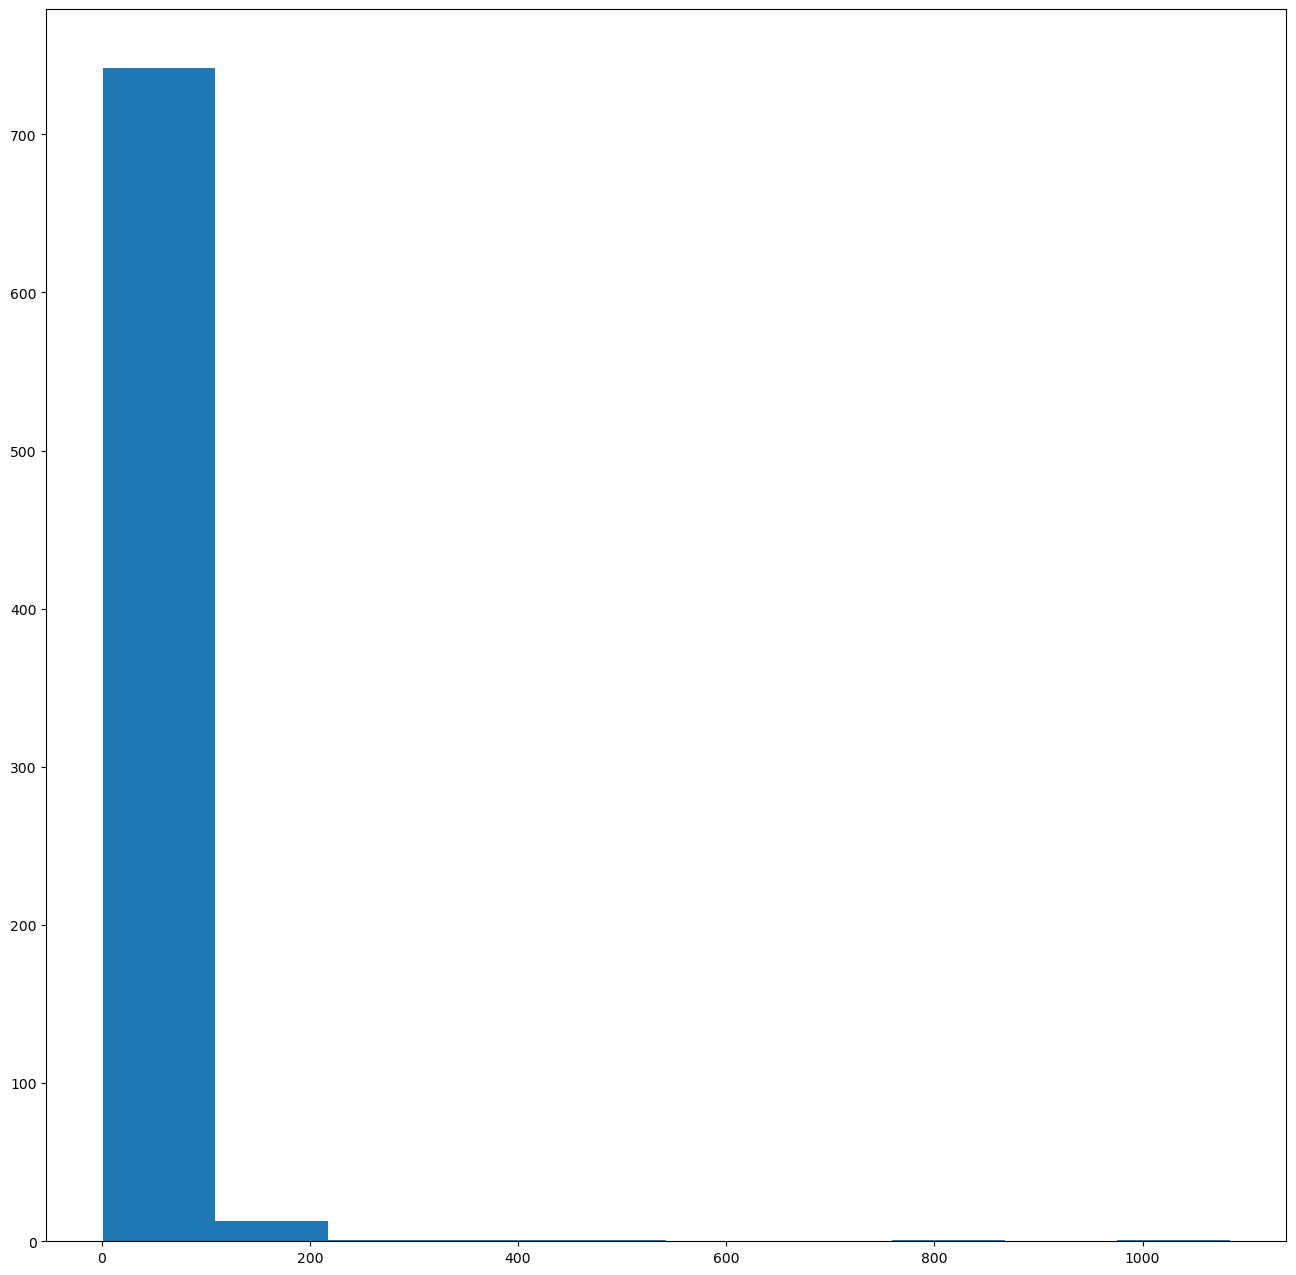

In [20]:
fig, ax = plt.subplots(figsize=(16,16))
ax.hist(keys_hist2)

In [21]:
#Graph based on references
#QUESTION 4
edges = []
nodes = []
for datum in data:
    node = datum[0]
    nodes.append(node)

for datum in data:
    node = datum[0]
    for reference in datum[4]:
        if (nodes.count(reference)):
            edges.append((node,reference))

len(nodes)
len(edges)

5284

In [22]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
print(len(G.nodes()))
G.add_edges_from(edges)
print(len(G.nodes()))
G_undir = G.to_undirected()

3557
3557


In [23]:
node_count = len(G.nodes())
edge_count = len(G.edges())
clustering = nx.average_clustering(G)
#components_count = nx.number_connected_components(G)

degrees = nx.degree(G)
avg_degree = 0
for degree in degrees:
    avg_degree += degree[1]
avg_degree /= node_count
"""
G_components = []
for node in G_undir.nodes():
    skip = False
    for component in G_components:
        if node in component.nodes():
            skip = True
            continue
    if skip:
        continue
    temp_comp = nx.descendants(G, node)
    temp_edges = G.edges(temp_comp)
    if len(temp_edges) > 0:
        G_comp = nx.from_edgelist(temp_edges)
        G_components.append(G_comp)
max_diameter = -1
count = 0

"""
max_diameter = 0
components = nx.connected_components(G_undir)
count = 0
for component in components:
    comp = G_undir.subgraph(component)
    max_diameter = max(max_diameter, (nx.diameter(comp)))
    count+=1
deviation = 0
for degree in degrees:
    deviation += (degree[1] - avg_degree)**2
deviation /= node_count
deviation = deviation**0.5

In [24]:
print (node_count, edge_count, clustering, avg_degree, deviation, max_diameter, count)

3557 5284 0.06352804872443882 2.971043013775654 3.337286367834354 25 830


In [25]:
G_edgelist = G.edges()
df = pandas.DataFrame(G_edgelist)
df.to_csv("G_edgelist.csv")

In [26]:
#QUESTION 5
hubs, authorities = nx.hits(G)
pagerank = nx.pagerank(G)

(array([3.437e+03, 6.800e+01, 2.800e+01, 1.100e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-9.81268467e-19,  2.23315972e-03,  4.46631944e-03,  6.69947917e-03,
         8.93263889e-03,  1.11657986e-02,  1.33989583e-02,  1.56321181e-02,
         1.78652778e-02,  2.00984375e-02,  2.23315972e-02]),
 <BarContainer object of 10 artists>)

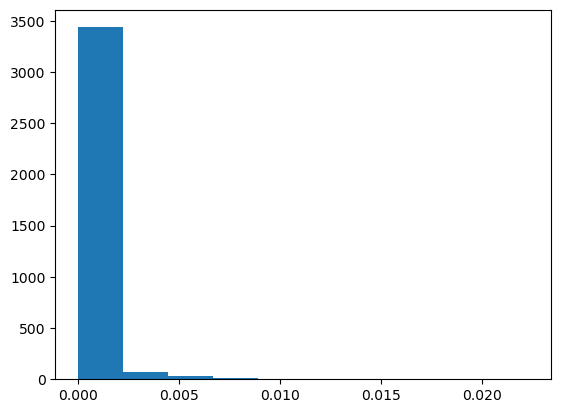

In [27]:
sorted_hubs = dict(sorted(hubs.items(), key=lambda item: item[1], reverse = True))
sorted_authorities = dict(sorted(authorities.items(), key=lambda item: item[1], reverse = True))
i = 0
plt.hist([items[1] for items in sorted_hubs.items()])

In [28]:
#QUESTION 6
author_edges = []
unique_authors = []
for item in auth_hist:
    author = item[0]
    unique_authors.append(author)
    for coauthor in authors[author]:
        author_edges.append((author, coauthor))

In [29]:
A = nx.Graph()
A.add_nodes_from(unique_authors)
A.add_edges_from(author_edges)
A = A.to_undirected()

In [30]:
print(len(A.nodes))
print(len(auth_hist))
print(len(author_edges))

10180
10180
95152


In [31]:
erdos = coauthors_count[0][0]
print(erdos)

Martyn P. Clark


In [32]:
#QUESTION 7
erdos_number = {}
for node in A.nodes():
    erdos_number[node] = -1

descendants = nx.algorithms.descendants(A, erdos)
for node in A.nodes():
    if node in descendants:
        erdos_number[node] = nx.shortest_path_length(A, node, erdos)

#sorted_erdos = dict(sorted(erdos_number.items(), key=lambda item: item[1]))

In [33]:
close_authors = []
for item in erdos_number.items():
    author, length = item
    if length > 0 and length <= 5:
        close_authors.append(author)

close_authors.append(erdos)

In [34]:
#QUESTION 8 (VISUALISATION IS IN WHATSAPP)
A_erdos = A.subgraph(close_authors)
print(len(A_erdos.nodes()))
print(len(close_authors))
A_edgelist = A_erdos.edges()
df = pandas.DataFrame(A_edgelist)
df.to_csv("A_edgelist.csv")

7078
7078


In [35]:
#QUESTION 10
unique_inst = []
inst_edges = []
for datum in data:
    temp_inst = []
    for author in datum[2]:
        for uni in author[1]:
            temp_inst.append(uni)
            if not unique_inst.count(uni):
                unique_inst.append(uni)
    for uni in temp_inst:
        for uni2 in temp_inst:
            if uni != uni2:
                inst_edges.append((uni, uni2))

In [36]:
I = nx.Graph()
I.add_nodes_from(unique_inst)
I.add_edges_from(inst_edges)
I = I.to_undirected()

In [ ]:
I_node_count = len(I.nodes())
I_edge_count = len(I.edges())

I_max_diameter = 0
I_components = nx.connected_components(I)
count = 0
for component in I_components:
    comp = I.subgraph(component)
    I_max_diameter = max(I_max_diameter, (nx.diameter(comp)))
    count+=1

I_clustering = nx.average_clustering(I)

I_degrees = nx.degree(I)
I_avg_degree = 0
for degree in I_degrees:
    I_avg_degree += degree[1]
I_avg_degree /= node_count

I_deviation = 0
for degree in I_degrees:
    I_deviation += (degree[1] - I_avg_degree)**2
I_deviation /= I_node_count
I_deviation = I_deviation**0.5

In [41]:
print(I_node_count, I_edge_count, I_max_diameter, I_clustering, I_avg_degree, I_deviation)

1945 15211 0 0.6358843707840576 8.552712960359854 27.363922180500403


(array([1.686e+03, 1.380e+02, 6.600e+01, 2.800e+01, 1.400e+01, 6.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

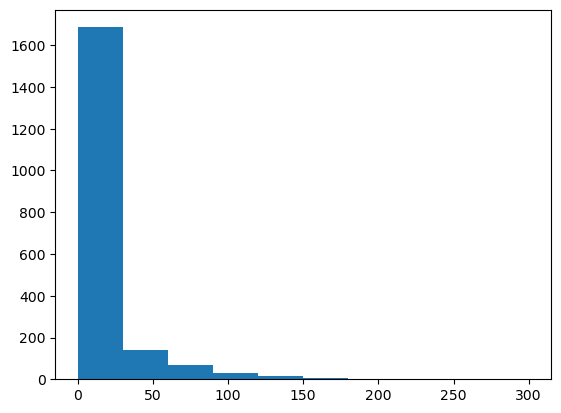

In [39]:
plt.hist([x[1] for x in I_degrees])